For this analysis, we will be taking a look at NYPD arrest data and comparing the data for the 17th precinct to that of 103rd precinct. 

According to the NYT's Ford Fessenden and Sam Roberts (as of 2011) the 17th precinct is located in one of the least diverse neighborhoods in NYC while the 103rd is more diverse. 

I am using the map from the article "Then as Now — New York’s Shifting Ethnic Mosaic" (https://archive.nytimes.com/www.nytimes.com/interactive/2011/01/23/nyregion/20110123-nyc-ethnic-neighborhoods-map.html) and the NYPD's find your precinct map (https://www.nyc.gov/site/nypd/bureaus/patrol/find-your-precinct.page).

In [174]:
#importing NYPD arrest data

import pandas as pd 
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20231227.csv')

In [175]:
#getting a sense of the data

df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [176]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)
170094,272045762,07/28/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,K,84,0,18-24,M,BLACK,988491,195163,40.702353,-73.984704,POINT (-73.98470449707197 40.70235306254946)


In [177]:
df.shape

(170095, 19)

In [178]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                         int64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [179]:
# trying to see how many age groups there are

df.groupby(['AGE_GROUP'])['AGE_GROUP'].count().sort_values(ascending = False)

AGE_GROUP
25-44    97601
45-64    33416
18-24    30036
<18       6245
65+       2797
Name: AGE_GROUP, dtype: int64

In [180]:
df.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending = False)

PERP_SEX
M    137574
F     29018
U      3503
Name: PERP_SEX, dtype: int64

In [181]:
# trying to see how many race groups there are

df.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending = False)

PERP_RACE
BLACK                             82041
WHITE HISPANIC                    43081
BLACK HISPANIC                    16501
WHITE                             16373
ASIAN / PACIFIC ISLANDER           9066
UNKNOWN                            2481
AMERICAN INDIAN/ALASKAN NATIVE      552
Name: PERP_RACE, dtype: int64

In [182]:
# trying to see how many offense categories there are, meta data explained that this column 
#has a more genral decription than the PD_DESC column, which holds a more granular description

df.groupby(['OFNS_DESC'])['OFNS_DESC'].count().sort_values(ascending = False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
                                  ...  
HOMICIDE-NEGLIGENT-VEHICLE            2
DISRUPTION OF A RELIGIOUS SERV        2
FELONY SEX CRIMES                     2
ADMINISTRATIVE CODES                  1
UNLAWFUL POSS. WEAP. ON SCHOOL        1
Name: OFNS_DESC, Length: 64, dtype: int64

In [183]:
# need find out how many categories there are

OFdf = df.groupby(['OFNS_DESC'])['OFNS_DESC'].count().sort_values(ascending = False)
OFdf.shape

(64,)

In [184]:
print(OFdf)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
                                  ...  
HOMICIDE-NEGLIGENT-VEHICLE            2
DISRUPTION OF A RELIGIOUS SERV        2
FELONY SEX CRIMES                     2
ADMINISTRATIVE CODES                  1
UNLAWFUL POSS. WEAP. ON SCHOOL        1
Name: OFNS_DESC, Length: 64, dtype: int64


In [185]:
OFdf.head(32)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
VEHICLE AND TRAFFIC LAWS           9442
CRIMINAL MISCHIEF & RELATED OF     8333
ROBBERY                            8169
GRAND LARCENY                      7901
DANGEROUS WEAPONS                  7245
OFFENSES AGAINST PUBLIC ADMINI     5148
BURGLARY                           4753
OTHER OFFENSES RELATED TO THEF     4123
SEX CRIMES                         3901
OFFENSES INVOLVING FRAUD           3846
OFF. AGNST PUB ORD SENSBLTY &      3044
POSSESSION OF STOLEN PROPERTY      2738
FORGERY                            2591
INTOXICATED & IMPAIRED DRIVING     1953
OTHER TRAFFIC INFRACTION           1615
GRAND LARCENY OF MOTOR VEHICLE     1470
MURDER & NON-NEGL. MANSLAUGHTE     1424
CRIMINAL TRESPASS                  1397
FOR OTHER AUTHORITIES              1257
OFFENSES AGAINST THE PERSON   

In [186]:
OFdf.tail(32)

OFNS_DESC
OTHER STATE LAWS (NON PENAL LA          316
GAMBLING                                296
INTOXICATED/IMPAIRED DRIVING            294
PROSTITUTION & RELATED OFFENSES         192
ADMINISTRATIVE CODE                     160
THEFT-FRAUD                             155
ALCOHOLIC BEVERAGE CONTROL LAW          118
ARSON                                   115
THEFT OF SERVICES                       111
JOSTLING                                 93
KIDNAPPING & RELATED OFFENSES            81
OFFENSES AGAINST PUBLIC SAFETY           79
HARRASSMENT 2                            74
ENDAN WELFARE INCOMP                     57
AGRICULTURE & MRKTS LAW-UNCLASSIFIED     49
FRAUDULENT ACCOSTING                     43
DISORDERLY CONDUCT                       36
CHILD ABANDONMENT/NON SUPPORT            34
OFFENSES RELATED TO CHILDREN             30
HOMICIDE-NEGLIGENT,UNCLASSIFIE           30
MOVING INFRACTIONS                       29
ANTICIPATORY OFFENSES                    20
(null)                

In [187]:
#extracting the month of each arrest

df['Month'] = pd.DatetimeIndex(df['ARREST_DATE']).month 

In [188]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Month
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426),1
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923),2
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468),2
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797),1
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175),2


In [189]:
#going to subset data, only interested in the level of offense, arrest precinct, age group, perp sex, perp race, offense decription and month 

Adf = df[['LAW_CAT_CD','ARREST_DATE','OFNS_DESC','ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX','PERP_RACE', 'Month']]


In [190]:
Adf.head()

,LAW_CAT_CD,ARREST_DATE,OFNS_DESC,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Month
0,F,01/01/2023,FELONY ASSAULT,77,45-64,F,BLACK,1
1,F,02/03/2023,DANGEROUS DRUGS,73,25-44,M,BLACK,2
2,F,02/15/2023,FELONY ASSAULT,62,25-44,M,WHITE,2
3,F,01/04/2023,FELONY ASSAULT,32,25-44,M,BLACK,1
4,F,02/13/2023,FELONY ASSAULT,71,25-44,M,BLACK,2


In [191]:
Adf.rename(columns={'LAW_CAT_CD':'LEVEL_OF_OFFENSE', 'Month':'MONTH'}, inplace=True)

/var/folders/xt/mv9rlvjn76lf_158ryz9zxh80000gn/T/ipykernel_3235/3690180482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adf.rename(columns={'LAW_CAT_CD':'LEVEL_OF_OFFENSE', 'Month':'MONTH'}, inplace=True)


In [192]:
Adf.head()

,LEVEL_OF_OFFENSE,ARREST_DATE,OFNS_DESC,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,MONTH
0,F,01/01/2023,FELONY ASSAULT,77,45-64,F,BLACK,1
1,F,02/03/2023,DANGEROUS DRUGS,73,25-44,M,BLACK,2
2,F,02/15/2023,FELONY ASSAULT,62,25-44,M,WHITE,2
3,F,01/04/2023,FELONY ASSAULT,32,25-44,M,BLACK,1
4,F,02/13/2023,FELONY ASSAULT,71,25-44,M,BLACK,2


In [193]:
#going to subset data to focus only on the 17th and 103rd precincts

df2 = Adf[(Adf['ARREST_PRECINCT'] == 17) | (Adf['ARREST_PRECINCT'] == 103)]


In [194]:
df2.groupby(['ARREST_PRECINCT'])['ARREST_PRECINCT'].count().sort_values(ascending = False)


ARREST_PRECINCT
103    4582
17      769
Name: ARREST_PRECINCT, dtype: int64

In [195]:
# getting some descriptive statistics based on age group

df2.groupby(['ARREST_PRECINCT','AGE_GROUP'])['AGE_GROUP'].describe()


count unique    top  freq
ARREST_PRECINCT AGE_GROUP                          
17              18-24        91      1  18-24    91
                25-44       472      1  25-44   472
                45-64       182      1  45-64   182
                65+          12      1    65+    12
                <18          12      1    <18    12
103             18-24       699      1  18-24   699
                25-44      2804      1  25-44  2804
                45-64       920      1  45-64   920
                65+          54      1    65+    54
                <18         105      1    <18   105

In [196]:
df2.groupby(['ARREST_PRECINCT']).count()

,LEVEL_OF_OFFENSE,ARREST_DATE,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,MONTH
ARREST_PRECINCT,,,,,,,
17,767,769,769,769,769,769,769
103,4581,4582,4582,4582,4582,4582,4582


In [197]:
#getting some descriptive statistics based on race

df2.groupby(['ARREST_PRECINCT','PERP_RACE'])['PERP_RACE'].describe()

count unique  \
ARREST_PRECINCT PERP_RACE                                     
17              AMERICAN INDIAN/ALASKAN NATIVE     3      1   
                ASIAN / PACIFIC ISLANDER          36      1   
                BLACK                            337      1   
                BLACK HISPANIC                    50      1   
                UNKNOWN                           13      1   
                WHITE                            172      1   
                WHITE HISPANIC                   158      1   
103             AMERICAN INDIAN/ALASKAN NATIVE    15      1   
                ASIAN / PACIFIC ISLANDER         488      1   
                BLACK                           2697      1   
                BLACK HISPANIC                   180      1   
                UNKNOWN                           72      1   
                WHITE                            327      1   
                WHITE HISPANIC                   803      1   

                                                                           top  \
ARREST_PRECINCT PERP_RACE                                                        
17              AMERICAN INDIAN/ALASKAN NATIVE  AMERICAN INDIAN/ALASKAN NATIVE   
                ASIAN / PACIFIC ISLANDER              ASIAN / PACIFIC ISLANDER   
                BLACK                                                    BLACK   
                BLACK HISPANIC                                  BLACK HISPANIC   
                UNKNOWN                                                UNKNOWN   
                WHITE                                                    WHITE   
                WHITE HISPANIC                                  WHITE HISPANIC   
103             AMERICAN INDIAN/ALASKAN NATIVE  AMERICAN INDIAN/ALASKAN NATIVE   
                ASIAN / PACIFIC ISLANDER              ASIAN / PACIFIC ISLANDER   
                BLACK                                                    BLACK   
                BLACK HISPANIC                                  BLACK HISPANIC   
                UNKNOWN                                                UNKNOWN   
                WHITE                                                    WHITE   
                WHITE HISPANIC                                  WHITE HISPANIC   

                                                freq  
ARREST_PRECINCT PERP_RACE                             
17              AMERICAN INDIAN/ALASKAN NATIVE     3  
                ASIAN / PACIFIC ISLANDER          36  
                BLACK                            337  
                BLACK HISPANIC                    50  
                UNKNOWN                           13  
                WHITE                            172  
                WHITE HISPANIC                   158  
103             AMERICAN INDIAN/ALASKAN NATIVE    15  
                ASIAN / PACIFIC ISLANDER         488  
                BLACK                           2697  
                BLACK HISPANIC                   180  
                UNKNOWN                           72  
                WHITE                            327  
                WHITE HISPANIC                   803

In [198]:
#getting some descriptive statistics based on level of offense

df2.groupby(['ARREST_PRECINCT','LEVEL_OF_OFFENSE'])['LEVEL_OF_OFFENSE'].describe()


count unique top  freq
ARREST_PRECINCT LEVEL_OF_OFFENSE                       
17              F                  301      1   F   301
                I                    2      1   I     2
                M                  460      1   M   460
                V                    4      1   V     4
103             9                    6      1   9     6
                F                 1849      1   F  1849
                I                    7      1   I     7
                M                 2701      1   M  2701
                V                   18      1   V    18

In [199]:
#Since the metadata provided by the NYPD states there are three levels of offense 
#felony, misdemeanor and violation, yet there is are two unknown categories I and 9 in the data
#I will be dropping the rows with the unknown categories for now.

df2['LEVEL_OF_OFFENSE'] = df2['LEVEL_OF_OFFENSE'].astype('str') 


/var/folders/xt/mv9rlvjn76lf_158ryz9zxh80000gn/T/ipykernel_3235/3993739255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LEVEL_OF_OFFENSE'] = df2['LEVEL_OF_OFFENSE'].astype('str')


In [200]:
df3 = df2[(df2['LEVEL_OF_OFFENSE'] == 'F') |(df2['LEVEL_OF_OFFENSE'] == 'M') |(df2['LEVEL_OF_OFFENSE'] == 'V')]



In [201]:
df3.dtypes

LEVEL_OF_OFFENSE    object
ARREST_DATE         object
OFNS_DESC           object
ARREST_PRECINCT      int64
AGE_GROUP           object
PERP_SEX            object
PERP_RACE           object
MONTH                int32
dtype: object

In [202]:
#getting some descriptive statistics based on lvl of offense

df3.groupby(['ARREST_PRECINCT','LEVEL_OF_OFFENSE'])['LEVEL_OF_OFFENSE'].describe()

count unique top  freq
ARREST_PRECINCT LEVEL_OF_OFFENSE                       
17              F                  301      1   F   301
                M                  460      1   M   460
                V                    4      1   V     4
103             F                 1849      1   F  1849
                M                 2701      1   M  2701
                V                   18      1   V    18

In [203]:
#getting descriptive statistics based on sex

df3.groupby(['ARREST_PRECINCT','PERP_SEX'])['PERP_SEX'].describe()

count unique top  freq
ARREST_PRECINCT PERP_SEX                       
17              F          140      1   F   140
                M          614      1   M   614
                U           11      1   U    11
103             F          798      1   F   798
                M         3659      1   M  3659
                U          111      1   U   111

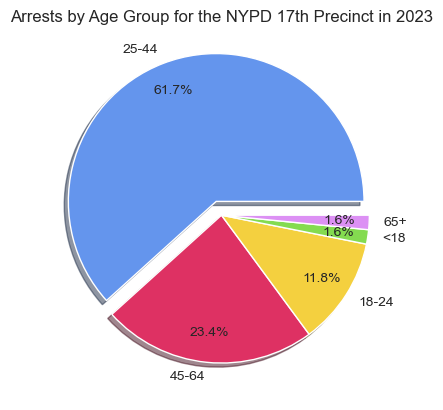

In [204]:
#Arrests by age group for the NYPD 17th precinct

import matplotlib.pyplot as plt 

#subsetting data to only focus on 17th precinct arrests
data1 = df3[df3['ARREST_PRECINCT'] == 17]


explode = [0.1,0,0,0,0]
color_palette = ['#6495ED', '#DE3163', '#F4D03F', '#84DB50', '#DC90F4']
plt.title('Arrests by Age Group for the NYPD 17th Precinct in 2023')


plt.pie(data1['AGE_GROUP'].value_counts().values, explode = explode,labels =data1['AGE_GROUP'].value_counts().index, colors =color_palette, autopct='%1.1f%%', pctdistance =.8 ,shadow = True)

plt.show()


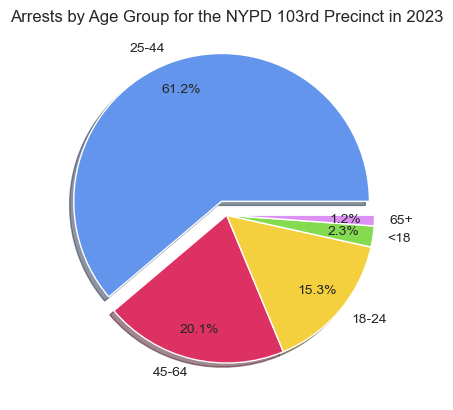

In [205]:
#Arrests by age group for the NYPD 103rd precinct

#subsetting data to only focus on 103rd precinct arrests
data2 = df3[df3['ARREST_PRECINCT'] == 103]

plt.title('Arrests by Age Group for the NYPD 103rd Precinct in 2023')

plt.pie(data2['AGE_GROUP'].value_counts().values, explode = explode,labels =data2['AGE_GROUP'].value_counts().index, colors =color_palette, autopct='%1.1f%%', pctdistance =.8 ,shadow = True)

plt.show()


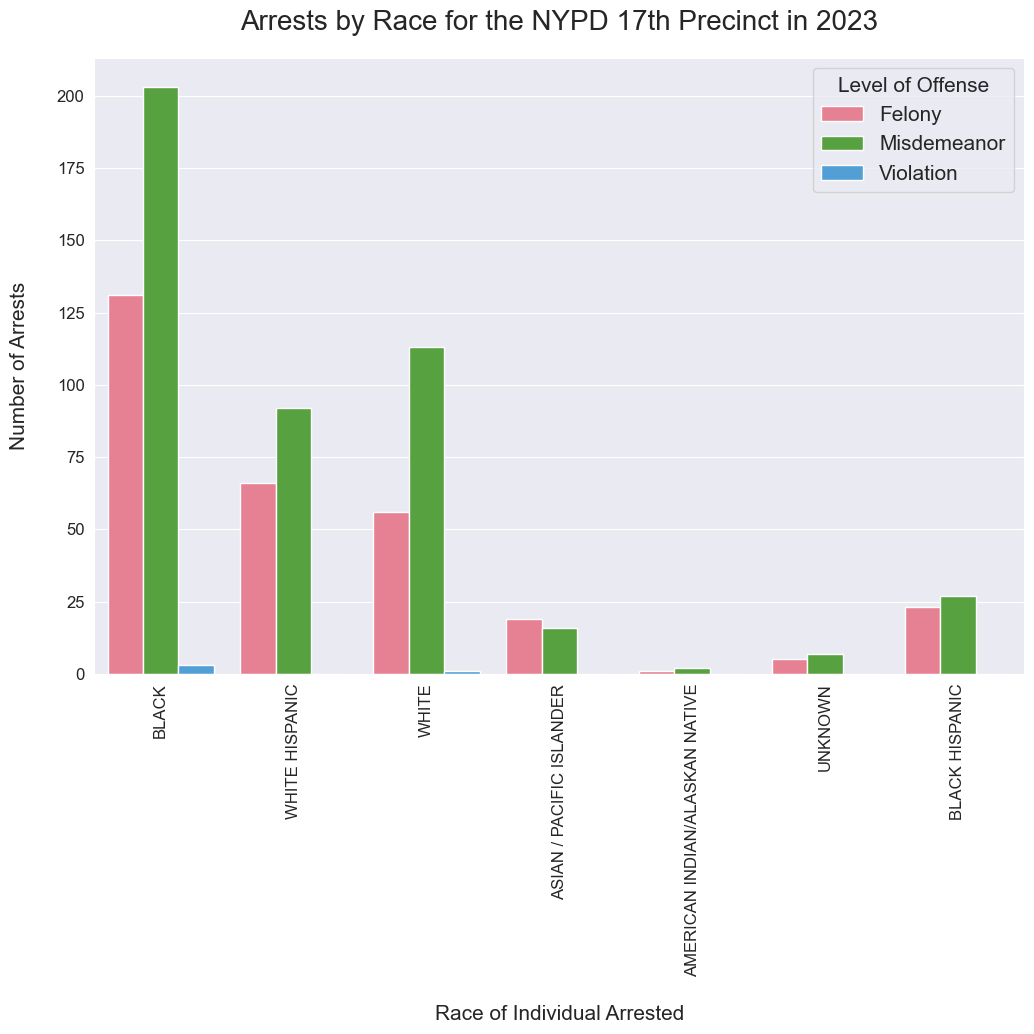

In [206]:
#Arrests by Race for the 17th Precicnt in 2023
import seaborn as sns 

#set graph size 
plt.figure(figsize=(12,8))

# Set the style
sns.set_style("darkgrid")

r = sns.countplot(data1, x="PERP_RACE", hue ="LEVEL_OF_OFFENSE", palette = "husl")
plt.xticks(rotation=90)
plt.title('Arrests by Race for the NYPD 17th Precinct in 2023',pad = 20, fontsize = 20)
plt.xlabel('Race of Individual Arrested', labelpad = 20, fontsize=15)
plt.ylabel('Number of Arrests',labelpad = 20, fontsize=15)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
legend_handles, _= r.get_legend_handles_labels()
r.legend(legend_handles, ['Felony','Misdemeanor','Violation'], 
          bbox_to_anchor=(1,1), 
          title='Level of Offense', fontsize="15", title_fontsize=15)


plt.show()

#alternate
#r.set(xlabel='Race of Individual Arrested', ylabel='Number of Arrests')
#r.xaxis.labelpad = 20
#r.yaxis.labelpad = 10


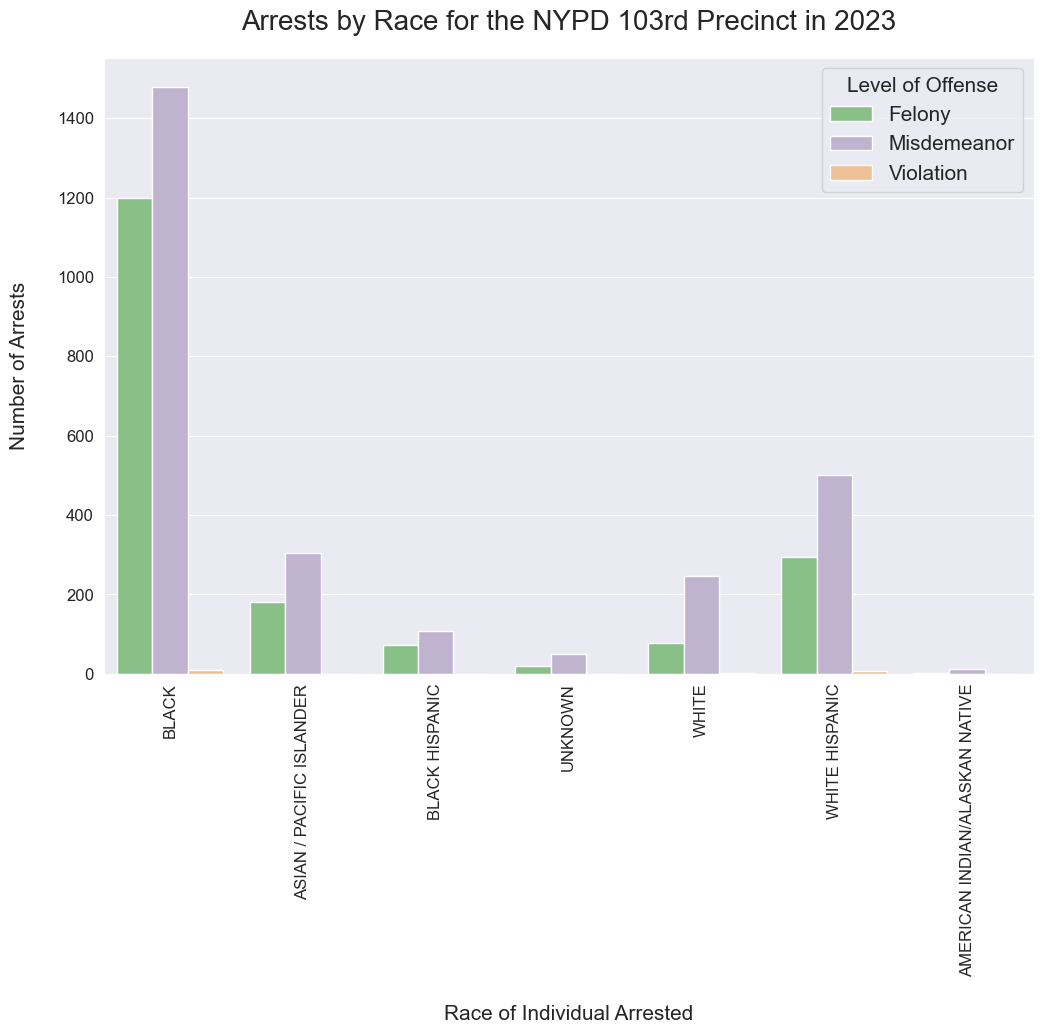

In [207]:
#Arrests by Race for the 103rd Precicnt in 2023

#set graph size 
plt.figure(figsize=(12,8))

# Set the style
sns.set_style("darkgrid")

r = sns.countplot(data2, x="PERP_RACE", hue ="LEVEL_OF_OFFENSE", palette = "Accent")
plt.xticks(rotation=90)
plt.title('Arrests by Race for the NYPD 103rd Precinct in 2023', pad = 20, fontsize = 20)
plt.xlabel('Race of Individual Arrested', labelpad = 20, fontsize=15)
plt.ylabel('Number of Arrests',labelpad = 20, fontsize=15)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
legend_handles, _= r.get_legend_handles_labels()
r.legend(legend_handles, ['Felony','Misdemeanor','Violation'], 
          bbox_to_anchor=(1,1), 
          title='Level of Offense', fontsize="15",title_fontsize=15)

plt.show()


For this analysis, I compared NYPD arrest data for the 17th precinct to that of 103rd precinct. The number of arrests of those in the 25-44 age group were the overwhelming majority in both precincts for the 2023. For the 17th precinct the number of arrests of those in the 25-44 age group was 61.7%, and 61.2% for the 103rd precinct.

An area of interest when starting this analysis was the comparison of arrests by race, as the 17th precinct is located in one of the least diverse neighborhoods in NYC and the 103rd precinct is loacted in one the more diverse neighborhoods in NYC. The number of arrests of those in that identify as Black were the overwhelming majority in both precincts for the 2023. For the 17th precinct the number of arrests of those in that identify as Black was 58.86%, and 43.82% for the 103rd precinct. For both precicnts the number of arrests for the American India/Alaskan Native race group is the lowest. Though, the low number of indivuals that idenitfy as American Native/Alaskan Native in New York City likely has to do with why the number of arrests for this group is low in both precincts.

In this instance there is a very regimented distinction between White Hispanic and Black Hispanic, and no catch all category for those who identify as Latino/Hispanic as a whole. This is interesting because having a catch all category would provide insights on the number of Latinos being arrested, those who as of now are seperated into the White Hispanic, Black Hispanic and perhaps Unknown category. Collecting the data with these specific categories affects the data, and does not give an accurate depiction of Hispanic/Latinos being arrested.